In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [114]:
df = pd.read_csv('USA_Housing.csv')

In [115]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [117]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [118]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [119]:
# Check if the size isn't too big for pairplots
len(df)

5000

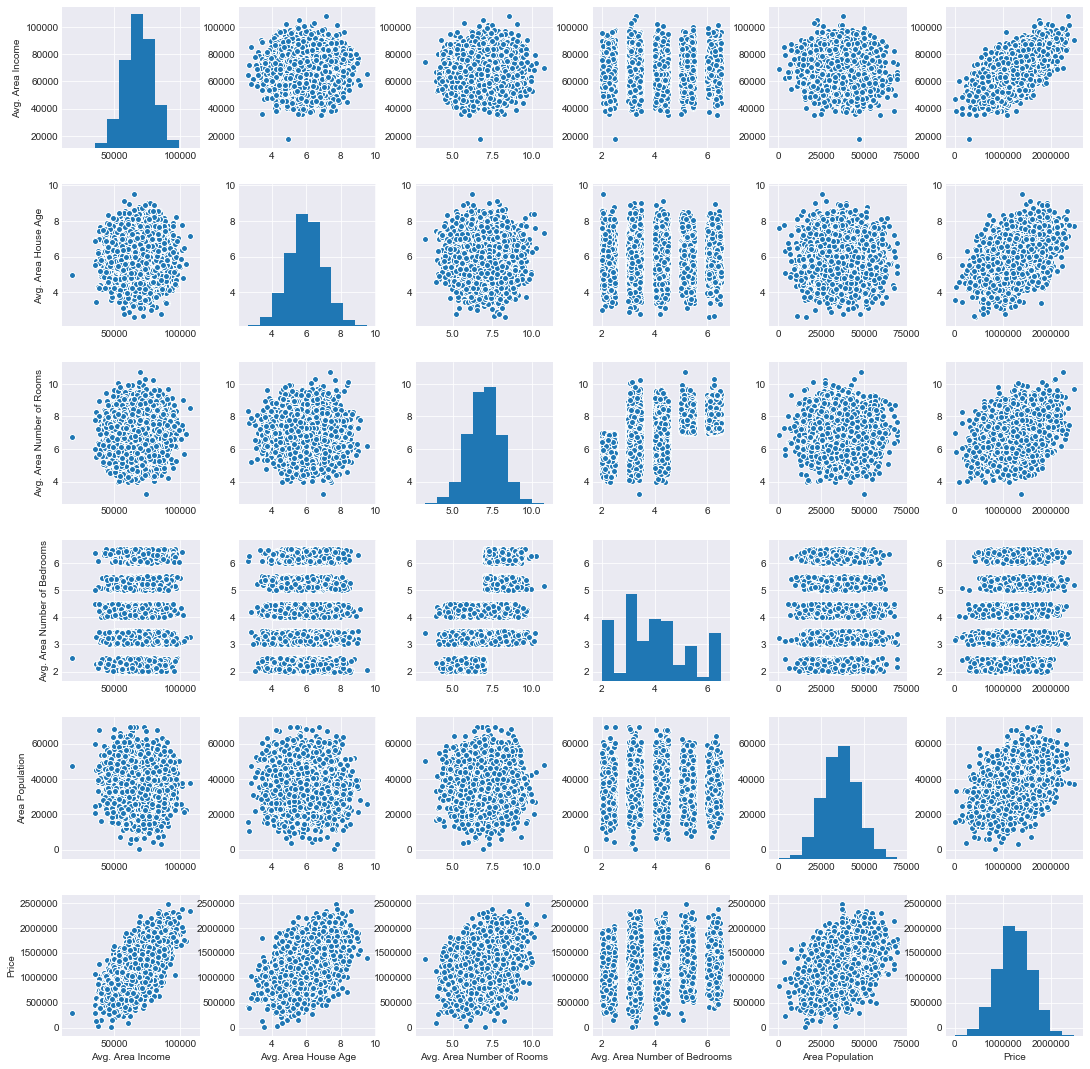

In [120]:
sns.pairplot(df)

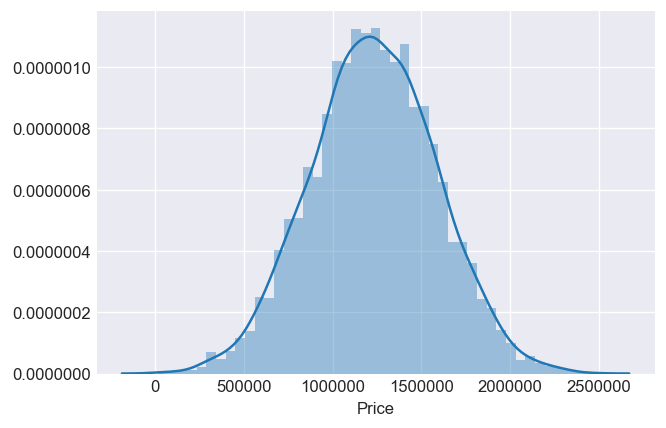

In [121]:
# Check the distribution of the prices
fig = plt.figure(dpi=120)
sns.distplot(df["Price"])

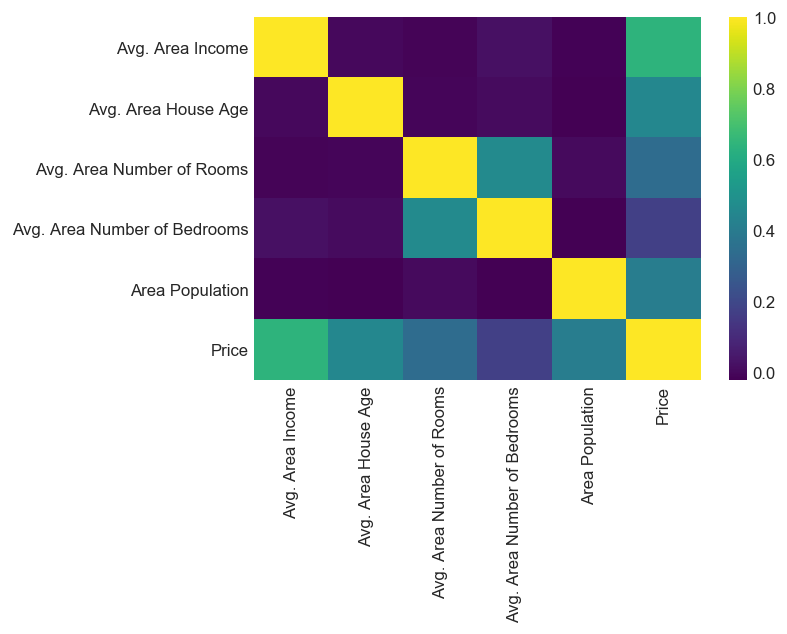

In [122]:
# Check the corr between all the columns
fig = plt.figure(dpi=120)
sns.heatmap(df.corr(), cmap="viridis")

In [123]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [124]:
# Set up X and y data
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y = df["Price"]

In [125]:
# Split for train and test
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [126]:
# Lets train the model
from sklearn.linear_model import LinearRegression

# Instantiate the model
lm = LinearRegression()

In [127]:
# Fit the model
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [128]:
# Evaluate the model
print("intercept_", lm.intercept_)

print("\nlm.coef_", lm.coef_)

intercept_ -2640159.79685

lm.coef_ [  2.15282755e+01   1.64883282e+05   1.22368678e+05   2.23380186e+03
   1.51504200e+01]


In [129]:
coef_df = pd.DataFrame(lm.coef_, X.columns, columns=["Coeff"])
coef_df.index.name = "Features"

In [130]:
coef_df

,Coeff
Features,
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [131]:
# Predict the test values
predictions = lm.predict(X_test)

predictions

array([ 1260960.70567626,   827588.75560352,  1742421.24254328, ...,
         372191.40626952,  1365217.15140895,  1914519.54178824])

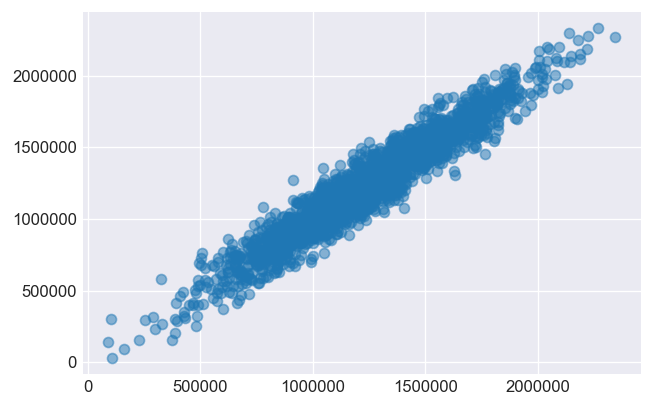

In [132]:
# Check how our model perform
plt.figure(dpi=120)
plt.scatter(predictions, y_test, alpha=0.5)

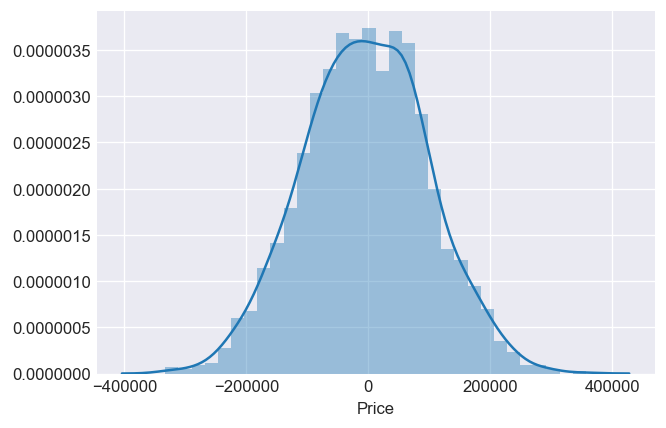

In [133]:
# Create an histogram of our resiguals (diff between y_test and the pred)
plt.figure(dpi=120)
sns.distplot((y_test-predictions))

In [134]:
# Check how pour model perform in numbers
from sklearn import metrics

# mean abs error
metrics.mean_absolute_error(y_test, predictions)

82288.222519149567

In [135]:
# mean squared error
metrics.mean_squared_error(y_test, predictions)

10460958907.209507

In [136]:
# roor mean squared error
np.sqrt(metrics.mean_absolute_error(y_test, predictions))

286.85923816246458